In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
#%cd '/content/drive/MyDrive/'

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/NewDailyDelhi.csv')
data

In [ ]:
data.info()

In [ ]:
#Check for null values
data.isnull().sum()

In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data.nunique()

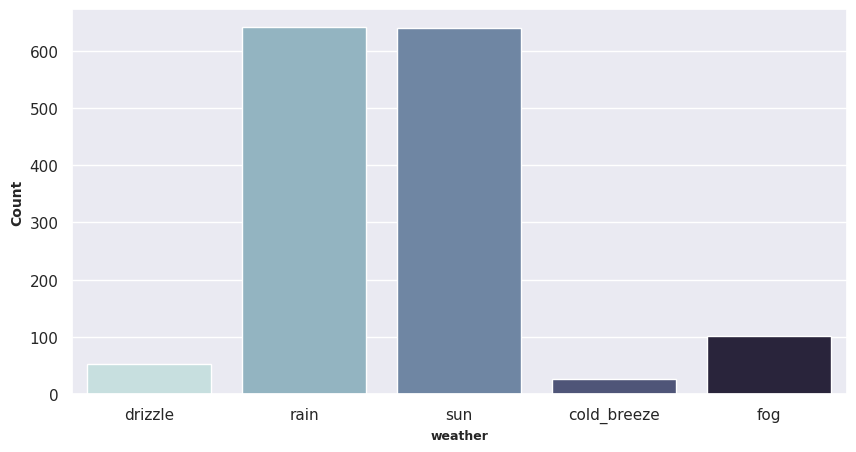

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme()
sns.countplot(x = 'weather',data = data,palette="ch:start=.2,rot=-.3")
plt.xlabel("weather",fontweight='bold',size=9)
plt.ylabel("Count",fontweight='bold',size=10)
plt.show()

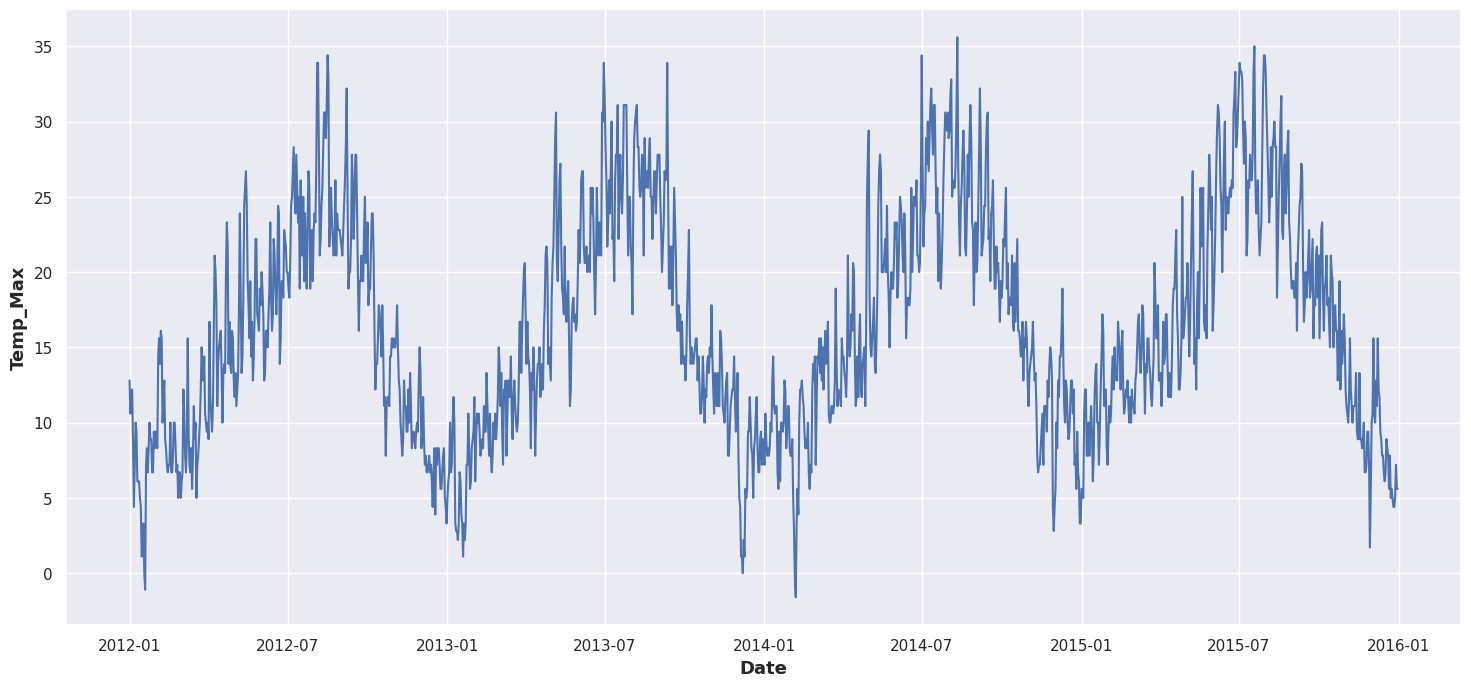

In [ ]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_max',data=data)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("Temp_Max",fontweight='bold',size=13)
plt.show()


Figures for data anlysis.

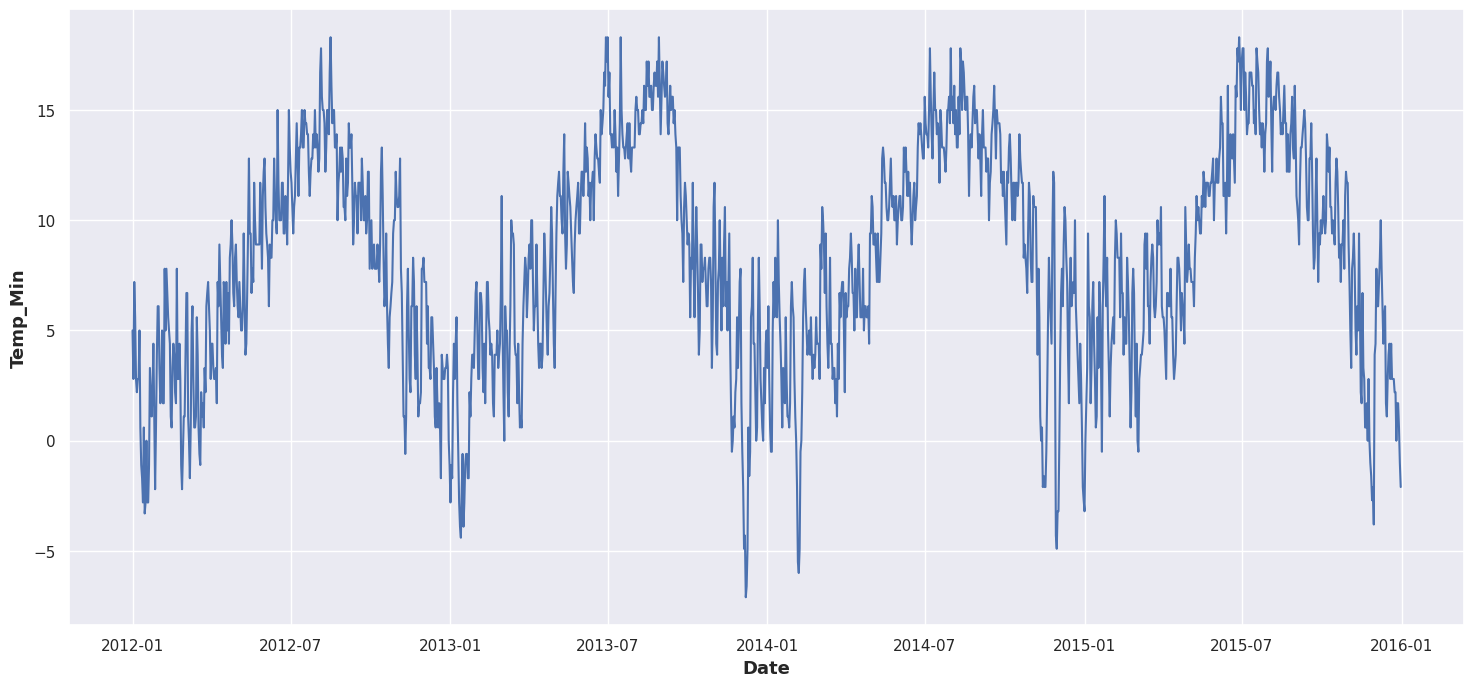

In [ ]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_min',data=data)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("Temp_Min",fontweight='bold',size=13)
plt.show()

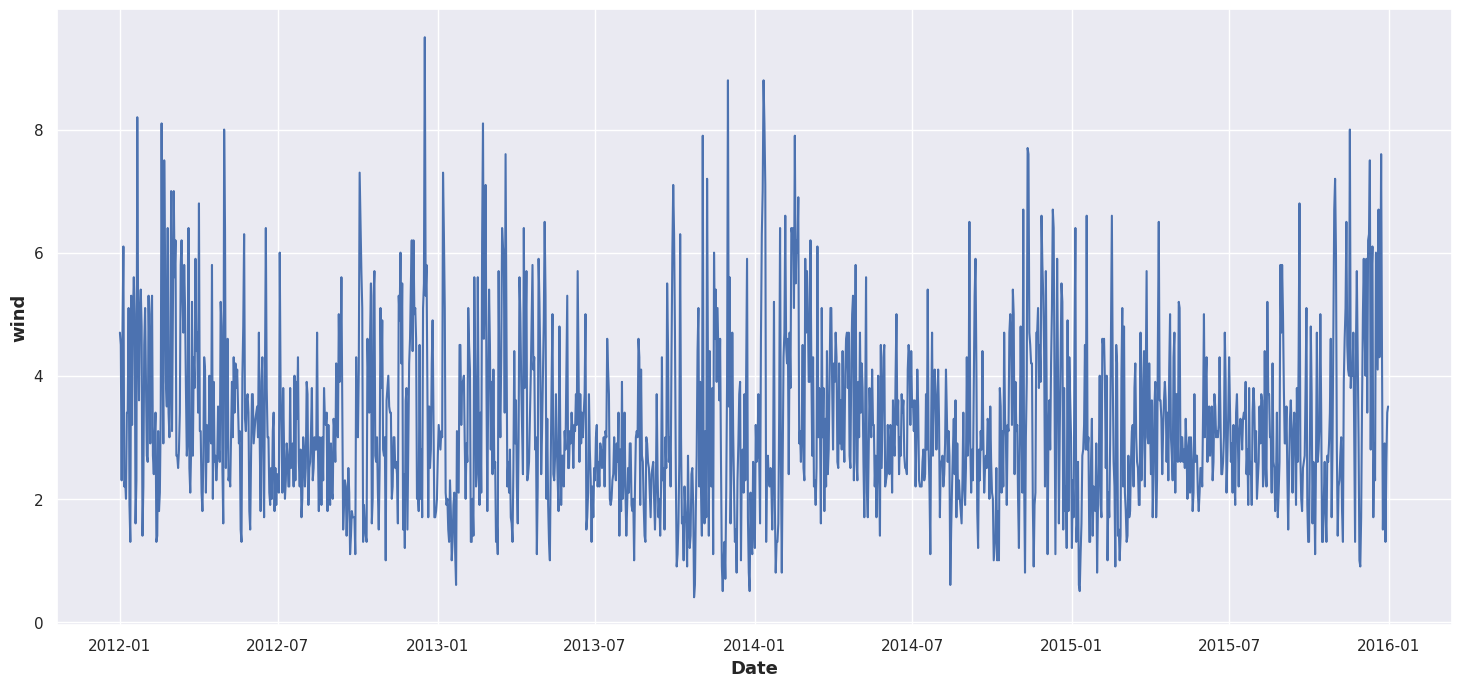

In [ ]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='wind',data=data)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("wind",fontweight='bold',size=13)
plt.show()


In [ ]:
#plt.figure(figsize=(14,8))
#sns.pairplot(data.drop('date',axis=1),hue='weather',palette="YlOrBr")
#plt.show()

In [ ]:
#plt.figure(figsize=(10,5))
#sns.catplot(x='weather',y ='temp_max',data=data,palette="crest")
#plt.show()

In [ ]:
#plt.figure(figsize=(10,5))
#sns.catplot(x='weather',y ='temp_min',data=data,palette = "RdBu")
#plt.show()

In [ ]:

#plt.figure(figsize=(10,5))
#sns.catplot(x='weather',y ='wind',data=data,palette = "magma")
#plt.show()

In [ ]:
#fig, axes = plt.subplots(2, 2, figsize=(18, 10))

#fig.suptitle('Price Range vs all numerical factor')

#sns.scatterplot(ax=axes[0, 0], data=data, x='weather', y='precipitation')
#sns.scatterplot(ax=axes[0, 1], data=data, x='weather', y='temp_max')
#sns.scatterplot(ax=axes[1, 0], data=data, x='weather', y='temp_min')
#sns.scatterplot(ax=axes[1, 1], data=data, x='weather', y='wind')
#plt.show()

Preprocessing data below by converting the weather labels into comparable values with other factors


In [ ]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    data[c1]= label_encoder.fit_transform(data[c1])
    data[c1].unique()
LABEL_ENCODING("weather")
data


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,1
1,2012-01-02,10.9,10.6,2.8,4.5,3
2,2012-01-03,0.8,11.7,7.2,2.3,3
3,2012-01-04,20.3,12.2,5.6,4.7,3
4,2012-01-05,1.3,8.9,2.8,6.1,3
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,3
1457,2015-12-28,1.5,5.0,1.7,1.3,3
1458,2015-12-29,0.0,7.2,0.6,2.6,2
1459,2015-12-30,0.0,5.6,-1.0,3.4,4


Dropping the data column so that the data can be compared as date may affect in predicting relations with other features

In [ ]:
data = data.drop('date',axis=1)

Splitting the data into target values and features.

In [ ]:
x = data.drop('weather',axis=1)
y = data['weather']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

splitting the train test split

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 4)
(366, 4)
(1095,)
(366,)


scaling the data to make it comparable and reduce the effect of outliers

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Logistic Regression


In [ ]:
# logistic regression

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([4, 3, 3, 4, 4, 3, 3, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 3, 4, 4, 3, 4, 3, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 3,
       4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 3, 3, 4, 4, 3,
       4, 4, 4, 4, 3, 4, 3, 3, 4, 4, 4, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4, 4,
       3, 4, 3, 4, 4, 4, 4, 3, 3, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3,
       4, 3, 3, 3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3,
       4, 3, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 4, 4, 4, 3, 3,
       4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 4, 4, 3, 3, 4, 3,
       4, 4, 3, 3, 4, 4, 3, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 4, 3,
       4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4,
       4, 3, 4, 3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 4, 3, 4, 3, 3, 3, 4, 4, 4,
       4, 4, 3, 4, 4, 3, 4, 3, 4, 3, 3, 4, 3, 4, 3,

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0   0   0   6   0]
 [  0   0   0   0  11]
 [  0   0   0   3  28]
 [  0   0   0 130  25]
 [  0   0   0  14 149]]


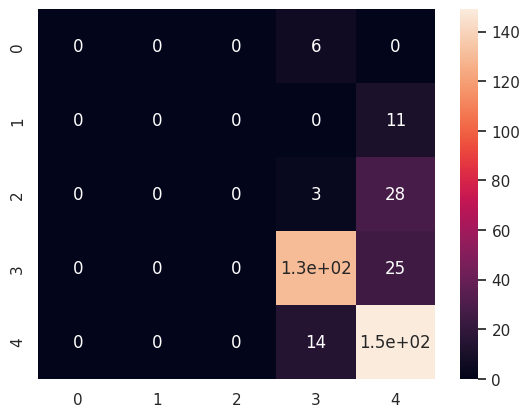

In [ ]:
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")

Accuracy score: 0.7622950819672131


SVM training

In [ ]:
# S V M MODLE Pred

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc2 = accuracy_score(y_test, y_pred)

[[  2   0   0   4   0]
 [  0   0   0   0  11]
 [  0   0   0   0  31]
 [  0   0   0 126  29]
 [  0   0   0   0 163]]


In [ ]:
print(f"Accuracy score: {acc2}")

Accuracy score: 0.7950819672131147


In [ ]:
#  K N N model

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  1   0   0   3   2]
 [  0   1   1   3   6]
 [  0   1   4   5  21]
 [  0   0   3 127  25]
 [  0   5  17  26 115]]


In [ ]:
acc3 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc3}")

Accuracy score: 0.6775956284153005


In [ ]:
#  naive baise

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  4   0   0   2   0]
 [  0   0   0   0  11]
 [  0   0   0   0  31]
 [  2   0   0 141  12]
 [  0   0   0   0 163]]


In [ ]:
acc4 = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc4}")

Accuracy score : 0.8415300546448088


Decsion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred


array([4, 1, 3, 4, 4, 3, 3, 3, 4, 3, 1, 3, 4, 2, 1, 4, 2, 3, 3, 3, 3, 3,
       3, 4, 4, 1, 4, 3, 1, 4, 3, 4, 0, 3, 3, 3, 1, 3, 1, 3, 4, 3, 3, 3,
       4, 1, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 0, 4, 3, 4, 4, 4, 2, 2, 3,
       4, 2, 4, 3, 3, 0, 3, 1, 2, 4, 3, 1, 3, 3, 4, 4, 3, 3, 3, 4, 4, 3,
       4, 3, 4, 2, 3, 2, 3, 0, 4, 1, 4, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 4,
       3, 4, 3, 4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 2, 3, 4, 4, 1, 4, 3, 4, 3,
       4, 3, 3, 3, 3, 4, 4, 4, 3, 0, 4, 4, 4, 3, 3, 4, 4, 4, 4, 2, 4, 3,
       2, 3, 1, 4, 3, 4, 4, 1, 3, 2, 3, 3, 4, 3, 3, 3, 2, 2, 3, 4, 3, 3,
       4, 4, 4, 4, 4, 4, 3, 2, 3, 2, 4, 3, 3, 4, 4, 4, 2, 4, 3, 3, 4, 1,
       3, 4, 3, 3, 2, 4, 3, 3, 3, 4, 2, 2, 0, 3, 3, 3, 2, 4, 2, 3, 3, 3,
       2, 4, 4, 3, 4, 4, 3, 4, 3, 1, 1, 3, 3, 3, 3, 2, 3, 4, 3, 3, 4, 3,
       4, 3, 3, 1, 3, 4, 1, 4, 4, 4, 3, 0, 4, 4, 4, 4, 4, 4, 3, 2, 4, 4,
       2, 3, 4, 3, 4, 2, 4, 4, 3, 3, 1, 2, 3, 4, 3, 4, 3, 3, 3, 1, 1, 4,
       3, 4, 3, 3, 2, 3, 4, 3, 2, 3, 3, 4, 3, 4, 3,

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  3   0   0   3   0]
 [  0   1   2   1   7]
 [  0   6   8   1  16]
 [  4   0   1 140  10]
 [  0  18  23   9 113]]


<Axes: >

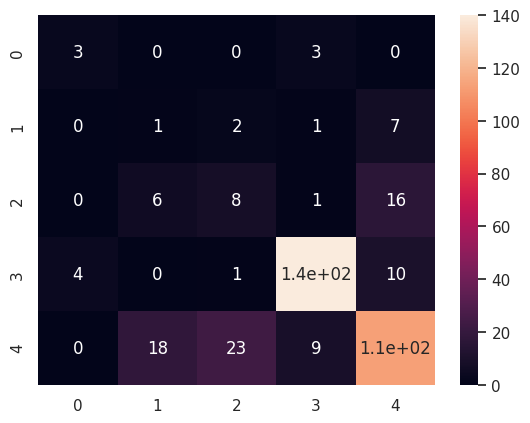

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
acc5 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc5}")

Accuracy score: 0.7240437158469946


Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(n_estimators =40, random_state = 0)
forest.fit(X_train,y_train)
RandomForestClassifier(n_estimators=40, random_state=0)
y_pred = forest.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

<Axes: >

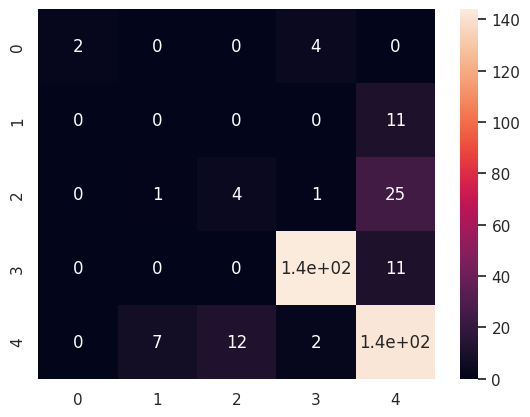

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.00      0.00      0.00        11
           2       0.25      0.13      0.17        31
           3       0.95      0.93      0.94       155
           4       0.75      0.87      0.81       163

    accuracy                           0.80       366
   macro avg       0.59      0.45      0.48       366
weighted avg       0.78      0.80      0.78       366



In [ ]:
acc6 = forest.score(X_test,y_test)
print(acc6)

0.7978142076502732


XGboost


In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Making confusion matrix


In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc7 = accuracy_score(y_test, y_pred)

[[  1   0   0   5   0]
 [  0   0   1   0  10]
 [  0   2   4   1  24]
 [  0   0   1 144  10]
 [  0   9  14   2 138]]


In [ ]:
print(acc7)

0.7841530054644809


Create visualization for all model with their Accuracy

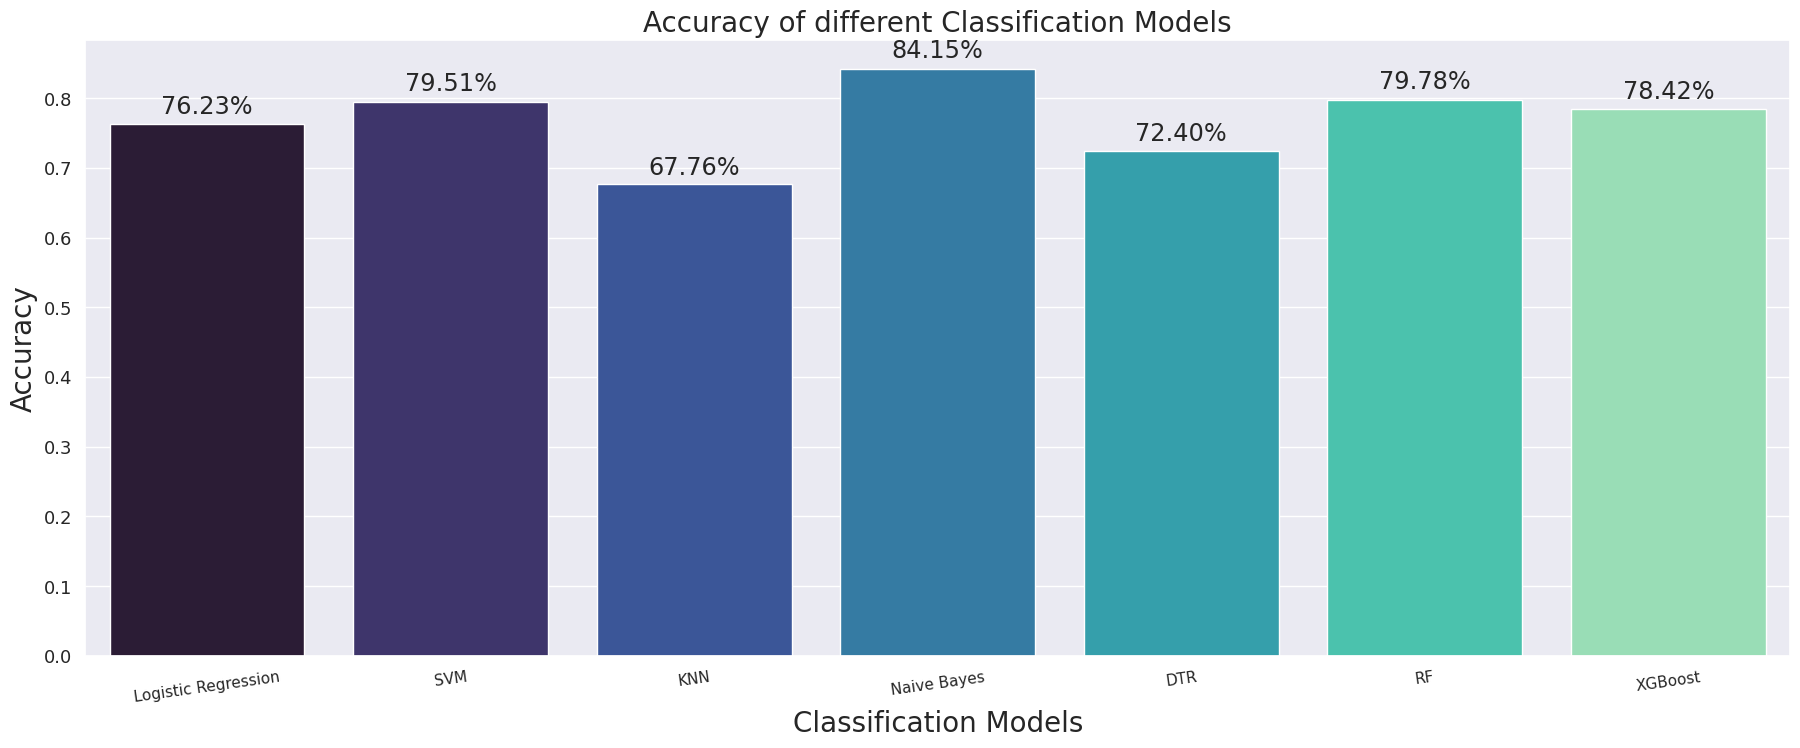

In [ ]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("SVM")
mylist.append(acc3)
mylist2.append("KNN")
mylist.append(acc4)
mylist2.append("Naive Bayes")
mylist.append(acc5)
mylist2.append("DTR")
mylist.append(acc6)
mylist2.append("RF")
mylist.append(acc7)
mylist2.append("XGBoost")
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
plt.figure(figsize=(22,8))
ax = sns.barplot(x=mylist2, y=mylist, palette = "mako", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import random

# Set a random seed for reproducibility
np.random.seed(0)

# Create date range for 30 days
date_range = pd.date_range(start='2023-01-01', periods=30, freq='D')

# Generate random data for temperature, pressure, and humidity
temperature = np.random.uniform(0, 20, 30) + 5  # Simulated temperature in Shimla (5°C - 25°C)
pressure = np.random.uniform(1000, 1020, 30)  # Simulated pressure in hPa (1000 hPa - 1020 hPa)
humidity = np.random.uniform(30, 80, 30)       # Simulated humidity in percentage (30% - 80%)

# Generate a target class based on temperature (e.g., 1 for cold, 2 for moderate, 3 for warm)
target_class = []
for temp in temperature:
    if temp < 10:
        target_class.append(1)  # Cold
    elif temp < 20:
        target_class.append(2)  # Moderate
    else:
        target_class.append(3)  # Warm

# Create a DataFrame to store the dataset
weather_data = pd.DataFrame({
    'Date': date_range,
    'Temperature (°C)': temperature,
    'Pressure (hPa)': pressure,
    'Humidity (%)': humidity,
    'Target Class': target_class
})

# Display the dataset
print(weather_data)


         Date  Temperature (°C)  Pressure (hPa)  Humidity (%)  Target Class
0  2023-01-01         15.976270     1005.291112     37.948479             2
1  2023-01-02         19.303787     1015.484674     35.518757             2
2  2023-01-03         17.055268     1009.123007     62.816479             2
3  2023-01-04         15.897664     1011.368679     36.909148             2
4  2023-01-05         13.473096     1000.375796     39.829118             2
5  2023-01-06         17.917882     1012.352710     48.436259             2
6  2023-01-07         13.751744     1012.241914     71.049661             2
7  2023-01-08         22.835460     1012.338680     34.855064             3
8  2023-01-09         24.273255     1018.874962     71.897245             3
9  2023-01-10         12.668830     1013.636406     34.804920             2
10 2023-01-11         20.834501     1007.190158     78.822973             3
11 2023-01-12         15.577898     1008.740639     53.432560             2
12 2023-01-1

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL of the webpage you want to scrape
url = "https://weather.com/en-IN/weather/monthly/l/3efa6a161f574ead082263ac5e9c30f1c8d5fedb0c3257c30b88473779ccec88"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content of the page using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table')

    # Use pandas to read the table into a DataFrame
    df = pd.read_html(str(table))[0]  # Convert the first table found to a DataFrame

    # Now 'df' contains the data from the table
    print(df)

else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)


     17 Nov  High   Low Precip
0  Averages    °C    --     --
1   Records  --()  --()     --


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL of the webpage you want to scrape
url = "https://weather.com/en-IN/weather/monthly/l/3efa6a161f574ead082263ac5e9c30f1c8d5fedb0c3257c30b88473779ccec88"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content of the page using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the table you want to scrape by inspecting the HTML source
    # For example, to scrape the first table:
    table = soup.find('table')

    # Initialize an empty list to store the rows
    rows = []

    # Loop through each row in the table
    for row in table.find_all('tr'):
        # Initialize an empty list to store the cells in each row
        cells = []

        # Loop through each cell in the row
        for cell in row.find_all(['th', 'td']):
            cells.append(cell.text.strip())  # Extract cell data and remove extra whitespace

        # Add the row data to the list of rows
        rows.append(cells)

    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows)

    # Now 'df' contains all the data from the table
    print(df)

else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)


          0     1     2       3
0    17 Nov  High   Low  Precip
1  Averages    °C    --      --
2   Records  --()  --()      --
